1. Analysis the data to see if there is any particular question type that we need spend some additional time on.

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

sns.set_style('whitegrid')
#sns.set_palette("husl")

%matplotlib inline

In [2]:
y7_2012 = pd.read_csv('./NAPLAN/naplan_schoolexportYr7_2012.csv')
y7_2013 = pd.read_csv('./NAPLAN/naplan_schoolexportYr7_2013.csv')
y7_2014 = pd.read_csv('./NAPLAN/naplan_schoolexportYr7_2014.csv')
y7_2015 = pd.read_csv('./NAPLAN/naplan_schoolexportYr7_2015.csv')
# need to predict
y7_2016 = pd.read_csv('./NAPLAN/naplan_schoolexportYr7_2016.csv')
y7_2017 = pd.read_csv('./NAPLAN/naplan_schoolexportYr7_2017.csv')
y9_2012 = pd.read_csv('./NAPLAN/naplan_schoolexportYr9_2012.csv')
y9_2013 = pd.read_csv('./NAPLAN/naplan_schoolexportYr9_2013.csv')
# useful
y9_2014 = pd.read_csv('./NAPLAN/naplan_schoolexportYr9_2014.csv')
y9_2015 = pd.read_csv('./NAPLAN/naplan_schoolexportYr9_2015.csv')
y9_2016 = pd.read_csv('./NAPLAN/naplan_schoolexportYr9_2016.csv')
y9_2017 = pd.read_csv('./NAPLAN/naplan_schoolexportYr9_2017.csv')

In [3]:
# train data
y7_2012_y9_2014 = pd.read_csv('y7_2012_y9_2014_2.csv' )
y7_2013_y9_2015 = pd.read_csv('y7_2013_y9_2015_2.csv' )
y7_2014_y9_2016 = pd.read_csv('y7_2014_y9_2016_2.csv' )
# test data
y7_2015_y9_2017 = pd.read_csv('y7_2015_y9_2017_2.csv' )


In [4]:
X_y7_2012 = pd.read_csv('X_y7_2012_2.csv')
X_y7_2013 = pd.read_csv('X_y7_2013_2.csv')
X_y7_2014 = pd.read_csv('X_y7_2014_2.csv')
X_y7_2015 = pd.read_csv('X_y7_2015_2.csv')
X_y7_2016 = pd.read_csv('X_y7_2016.csv')
X_y7_2017 = pd.read_csv('X_y7_2017.csv')

X_y9_2012 = pd.read_csv('X_y9_2012.csv')
X_y9_2013 = pd.read_csv('X_y9_2013.csv')
X_y9_2014 = pd.read_csv('X_y9_2014.csv')
X_y9_2015 = pd.read_csv('X_y9_2015.csv')
X_y9_2016 = pd.read_csv('X_y9_2016.csv')
X_y9_2017 = pd.read_csv('X_y9_2017.csv')

In [5]:
# verbes
X_y7_2012_v = pd.read_csv('X_y7_2012_verbes_2.csv')
X_y7_2013_v = pd.read_csv('X_y7_2013_verbes_2.csv')
X_y7_2014_v = pd.read_csv('X_y7_2014_verbes_2.csv')
X_y7_2015_v = pd.read_csv('X_y7_2015_verbes_2.csv')
X_y7_2016_v = pd.read_csv('X_y7_2016_verbes_2.csv')
X_y7_2017_v = pd.read_csv('X_y7_2017_verbes_2.csv')

X_y9_2012_v = pd.read_csv('X_y9_2012_verbes.csv')
X_y9_2013_v = pd.read_csv('X_y9_2013_verbes.csv')
X_y9_2014_v = pd.read_csv('X_y9_2014_verbes.csv')
X_y9_2015_v = pd.read_csv('X_y9_2015_verbes.csv')
X_y9_2016_v = pd.read_csv('X_y9_2016_verbes.csv')
X_y9_2017_v = pd.read_csv('X_y9_2017_verbes.csv')

# Plot y9 band

The performance for this school

In [6]:
yc2012_y9band = pd.DataFrame(y9_2012['Band Year 9: Numeracy'].dropna() >=8)
yc2012_y9band['Year'] = 2012
yc2013_y9band = pd.DataFrame(y9_2013['Band Year 9: Numeracy'].dropna() >=8)
yc2013_y9band['Year'] = 2013
yc2014_y9band = pd.DataFrame(y9_2014['Band Year 9: Numeracy'].dropna() >=8)
yc2014_y9band['Year'] = 2014
yc2015_y9band = pd.DataFrame(y9_2015['Band Year 9: Numeracy'].dropna() >=8)
yc2015_y9band['Year'] = 2015
yc2016_y9band = pd.DataFrame(y9_2016['Band Year 9: Numeracy'].dropna() >=8)
yc2016_y9band['Year'] = 2016
yc2017_y9band = pd.DataFrame(y9_2017['Band Year 9: Numeracy'].dropna() >=8)
yc2017_y9band['Year'] = 2017


df_y9band = pd.concat([yc2012_y9band, yc2013_y9band,yc2014_y9band,
                       yc2015_y9band,yc2016_y9band,yc2017_y9band])
df_y9band['Count'] = 1


df_y9band = df_y9band.groupby(['Year','Band Year 9: Numeracy']).count().reset_index()

total_student = []
for y in range(2012,2018):
    total_student.append(sum(df_y9band[df_y9band.Year == y].Count))
    total_student.append(sum(df_y9band[df_y9band.Year == y].Count))
df_y9band['Total_student'] = total_student
df_y9band['Percentage'] = df_y9band.Count /df_y9band['Total_student']
df_y9band

,Year,Band Year 9: Numeracy,Count,Total_student,Percentage
0,2012,False,35,206,0.169903
1,2012,True,171,206,0.830097
2,2013,False,49,204,0.240196
3,2013,True,155,204,0.759804
4,2014,False,32,205,0.156098
5,2014,True,173,205,0.843902
6,2015,False,35,207,0.169082
7,2015,True,172,207,0.830918
8,2016,False,28,206,0.135922
9,2016,True,178,206,0.864078


In [7]:
df_y9band

,Year,Band Year 9: Numeracy,Count,Total_student,Percentage
0,2012,False,35,206,0.169903
1,2012,True,171,206,0.830097
2,2013,False,49,204,0.240196
3,2013,True,155,204,0.759804
4,2014,False,32,205,0.156098
5,2014,True,173,205,0.843902
6,2015,False,35,207,0.169082
7,2015,True,172,207,0.830918
8,2016,False,28,206,0.135922
9,2016,True,178,206,0.864078


In [8]:
sum(df_y9band[df_y9band.Year == 2012].Count)

206

In [9]:
df_y9band[df_y9band['Band Year 9: Numeracy'] == True].Percentage

1     0.830097
3     0.759804
5     0.843902
7     0.830918
9     0.864078
11    0.845411
Name: Percentage, dtype: float64

In [10]:
df_y9band_plot = pd.DataFrame({'Band 8 or above':df_y9band[df_y9band['Band Year 9: Numeracy'] == True].Percentage,
                               'Band 7 or below':df_y9band[df_y9band['Band Year 9: Numeracy'] == False].Percentage,
                               'Year':df_y9band.Year
    
    
    
})
df_y9band_plot = df_y9band_plot.groupby('Year').sum()
df_y9band_plot


,Band 7 or below,Band 8 or above
Year,,
2012,0.169903,0.830097
2013,0.240196,0.759804
2014,0.156098,0.843902
2015,0.169082,0.830918
2016,0.135922,0.864078
2017,0.154589,0.845411


In [11]:
#df_y9band_plot.to_csv('plot_y9band.csv', header=True, index = True)

In [12]:
df_y9band_plot.mean()

Band 7 or below    0.170965
Band 8 or above    0.829035
dtype: float64

Plot in Tableau

In [13]:
sns.set_style("whitegrid")

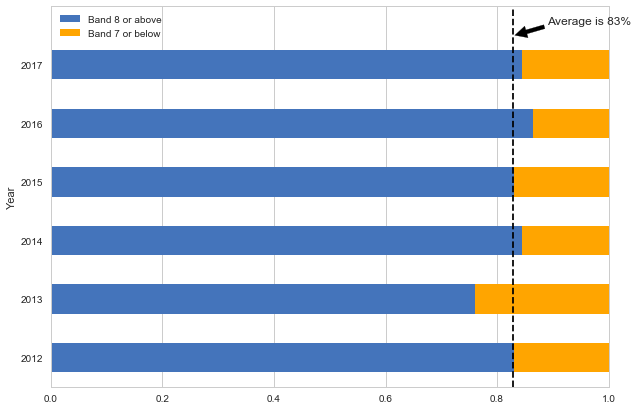

In [17]:
fig, ax = plt.subplots(figsize = (10,7))
df_y9band_plot[['Band 8 or above','Band 7 or below']].plot.barh(stacked = True, ax = ax,
                                                               color = ['#4474BB','orange'])
ax.axvline(0.829, color = 'black',ls='dashed')
ax.legend(loc = 'upper left')
ax.set_xlim([0, 1.])
ax.set_ylim([-0.5, 6])
ax.annotate('Average is 83%', xy=(0.83, 5.5), xytext=(0.89, 5.7),
            arrowprops=dict(facecolor='black', shrink=0.03) ,fontsize = 12)


** Except 2013, More than 80% students meet the min standard(Band 8)**

The percentage for students in Australian who meet the min standadd is 50%.


In [15]:
#sns.barplot(x="Year", y="Percentage",hue = 'Band Year 9: Numeracy', 
#            data=df_y9band,)


In [16]:
yr2012_y9band = pd.DataFrame(y9_2012['Band Year 9: Numeracy'].dropna())
yr2012_y9band['Year'] = 2012
yr2013_y9band = pd.DataFrame(y9_2013['Band Year 9: Numeracy'].dropna())
yr2013_y9band['Year'] = 2013
yr2014_y9band = pd.DataFrame(y9_2014['Band Year 9: Numeracy'].dropna())
yr2014_y9band['Year'] = 2014
yr2015_y9band = pd.DataFrame(y9_2015['Band Year 9: Numeracy'].dropna())
yr2015_y9band['Year'] = 2015
yr2016_y9band = pd.DataFrame(y9_2016['Band Year 9: Numeracy'].dropna())
yr2016_y9band['Year'] = 2016
yr2017_y9band = pd.DataFrame(y9_2017['Band Year 9: Numeracy'].dropna())
yr2017_y9band['Year'] = 2017

In [17]:
df_y9band_2 = pd.concat([yr2012_y9band, yr2013_y9band,yr2014_y9band,
                       yr2015_y9band,yr2016_y9band,yr2017_y9band])

In [18]:
df_y9band_2.head()

,Band Year 9: Numeracy,Year
0,8.0,2012
1,9.0,2012
2,6.0,2012
3,10.0,2012
4,9.0,2012


In [19]:
df_y9band_2[df_y9band_2.Year == 2014]['Band Year 9: Numeracy'].value_counts()

10.0    70
9.0     58
8.0     45
7.0     27
6.0      4
5.0      1
Name: Band Year 9: Numeracy, dtype: int64

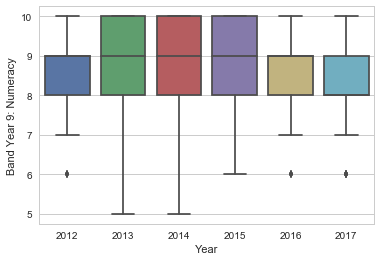

In [20]:
sns.boxplot(x='Year', y='Band Year 9: Numeracy', data=df_y9band_2)


# Does ESL Phase influence the Y9 numercy band?

ESL: 
English as a Second Language

Native language for thoes students is not English

In [21]:
sum(y7_2012['ESL Phase'] == 0)

106

In [22]:
df1 = pd.concat([y7_2012[['SRN','ESL Phase']],
                y7_2013[['SRN','ESL Phase']],
                y7_2014[['SRN','ESL Phase']],
                y7_2015[['SRN','ESL Phase']],
                y7_2016[['SRN','ESL Phase']],
                y7_2017[['SRN','ESL Phase']]]
               )
df1.head()

,SRN,ESL Phase
0,436530790,0
1,441546149,2
2,434109426,3
3,432640256,0
4,434220173,0


In [23]:
y9_2016['Band Year 7: Numeracy'] = y9_2016['Previous Band Year 7: Numeracy']
y9_2017['Band Year 7: Numeracy'] = y9_2017['Previous Band Year 7: Numeracy']

In [24]:
df3 = pd.concat([y7_2012_y9_2014[['SRN','Band Year 7: Numeracy','Band Year 9: Numeracy']],
                 y7_2013_y9_2015[['SRN','Band Year 7: Numeracy','Band Year 9: Numeracy']],
                 y7_2014_y9_2016[['SRN','Band Year 7: Numeracy','Band Year 9: Numeracy']],
                 y7_2015_y9_2017[['SRN','Band Year 7: Numeracy','Band Year 9: Numeracy']],
                 y9_2016[['SRN','Band Year 7: Numeracy','Band Year 9: Numeracy']],
                 y9_2017[['SRN','Band Year 7: Numeracy','Band Year 9: Numeracy']],
                ])
df3.head()  

,SRN,Band Year 7: Numeracy,Band Year 9: Numeracy
0,436530790,7.0,9.0
1,441546149,9.0,10.0
2,432640256,7.0,8.0
3,434220173,7.0,7.0
4,431672294,9.0,10.0


In [25]:
#new_2012 = pd.merge(df1, df2,on = 'SRN') 
new_2012_band = pd.merge(df1, df3,on = 'SRN')

In [26]:
new_2012_band['ESL Phase'].value_counts()

0    661
3    273
9    146
2     66
1      1
Name: ESL Phase, dtype: int64

In [27]:
new_2012_band['y9_band'] = new_2012_band['Band Year 9: Numeracy']>=8

In [28]:
new_2012_band.head()

,SRN,ESL Phase,Band Year 7: Numeracy,Band Year 9: Numeracy,y9_band
0,436530790,0,7.0,9.0,True
1,441546149,2,9.0,10.0,True
2,432640256,0,7.0,8.0,True
3,434220173,0,7.0,7.0,False
4,431672294,3,9.0,10.0,True


In [29]:
new_2012_band.groupby(['ESL Phase']).count()

,SRN,Band Year 7: Numeracy,Band Year 9: Numeracy,y9_band
ESL Phase,,,,
0,661,659,660,661
1,1,1,1,1
2,66,66,65,66
3,273,273,273,273
9,146,145,146,146


In [30]:
test = new_2012_band.groupby(['ESL Phase','y9_band']).count()['Band Year 9: Numeracy']
test

ESL Phase  y9_band
0          False      107
           True       553
1          True         1
2          False       11
           True        54
3          False       34
           True       239
9          False       19
           True       127
Name: Band Year 9: Numeracy, dtype: int64

In [31]:
test = test.reset_index()
#test.set_index('ESL Phase', drop = True, inplace = True)

In [32]:
test

,ESL Phase,y9_band,Band Year 9: Numeracy
0,0,False,107
1,0,True,553
2,1,True,1
3,2,False,11
4,2,True,54
5,3,False,34
6,3,True,239
7,9,False,19
8,9,True,127


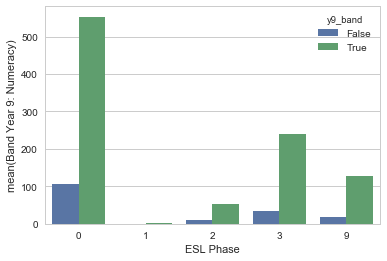

In [34]:
sns.barplot(x = 'ESL Phase', y = 'Band Year 9: Numeracy',data = test,hue = 'y9_band',)



##  Chi squared test

hypothesis

H0: there is no significant difference in whether the students has ESL background are more likly to reach Band 8 in Y9

In [35]:
import scipy.stats as stats
(chi_squared_score, p_value, dof, expected)=stats.chi2_contingency([[104, 530], [9, 36], 
                                                                    [33, 232],[19, 123]])
print chi_squared_score,p_value

3.43472353054 0.329327464893


**The pvalue shows that H0 is true, ESL and reaching band 8 in Y9 for Numeracy is independent**

# Year 9 Question Analysis
Is there any particular question type that we need spend some additional time on.

In [18]:
y9_df1 = pd.concat([X_y9_2012,X_y9_2013,X_y9_2014,
                 X_y9_2015,X_y9_2016,X_y9_2017]).set_index('SRN')

In [20]:
stage_list = [2]*10 +[3]*15 + [4]*18 + [5]*15

In [21]:
syllabus_dict = {'MA2-11MG':'Volume and Capacity', 'MA2-12MG':'Mass',
                 'MA2-13MG':'Time', 'MA2-14MG':'Three-Dimensional Space',
                 'MA2-15MG':'Two-Dimensional Space', 'MA2-17MG':'Position',
                 'MA2-4NA':'Whole Numbers', 'MA2-6NA':'Multiplication and Division',
                 'MA2-7NA':'Fractions and Decimals', 'MA2-8NA':'Patterns and Algebra',
                 'MA3-10MG':'Area', 'MA3-11MG':"Volume and Capacity",
                 'MA3-13MG':'Time', 'MA3-14MG':'Three-Dimensional Space',
                 'MA3-15MG':'Two-Dimensional Space', 'MA3-16MG':'Angles',
                 'MA3-17MG':'Position', 'MA3-18SP':'Data', 'MA3-19SP':'Chance',
                 'MA3-4NA':"Whole Numbers", 'MA3-5NA':'Addition and Subtraction',
                 'MA3-6NA':'Multiplication and Division','MA3-7NA':"Fractions, Decimals and Percentages",
                 'MA3-8NA':"Patterns and Algebra",'MA3-9MG':"Length",
                 'MA4-10NA':'Equations','MA4-11NA':"Linear Relationships",
                 'MA4-12MG':'Length', 'MA4-13MG':'Area', 'MA4-14MG':'Volume',
                 'MA4-15MG':'Time', 'MA4-16MG':"Right-Angled Triangles",
                 'MA4-17MG':'Properties of Geometrical Figures','MA4-18MG':'Angle Relationships',
                 'MA4-19SP':'Data Collection and Representation','MA4-20SP':'Single Variable Data Analysis',
                 'MA4-21SP':'Probability','MA4-4NA':'Computation with Integers',
                 'MA4-5NA':'Fractions, Decimals and Percentages','MA4-6NA':'Financial Mathematics',
                 'MA4-7NA':'Ratios and Rates','MA4-8NA':'Algebraic Techniques',
                 'MA4-9NA':'Indices','MA5.1-11MG':'Properties of Geometrical Figures',
                 'MA5.1-12SP':'Single Variable Data Analysis','MA5.1-13SP':"Probability",
                 'MA5.1-4NA':'Financial Mathematics','MA5.1-5NA':'Indices',
                 'MA5.1-6NA':'Linear Relationships','MA5.1-7NA':'Non-Linear Relationships',
                 'MA5.1-8MG':'Area and Surface Area','MA5.1-9MG':'Numbers of Any Magnitude',
                 'MA5.2-17SP':'Probability','MA5.2-5NA':'Ratios and Rates',
                 'MA5.2-6NA':'Algebraic Techniques','MA5.2-8NA':'Equations',
                 'MA5.3-13MG':'Area and Surface Area','MA5.3-4NA':'Ratios and Rates'
    
}

In [22]:
# create new columns
new_columns = [syllabus_dict.get(i,0) for i in list(y9_df1.columns) ]


In [23]:
new_columns2 = []
count = 0
for i in new_columns:
    new_columns2.append(i+'(Stage '+str(stage_list[count]) + ')')
    count+=1
new_columns2

['Volume and Capacity(Stage 2)',
 'Mass(Stage 2)',
 'Time(Stage 2)',
 'Three-Dimensional Space(Stage 2)',
 'Two-Dimensional Space(Stage 2)',
 'Position(Stage 2)',
 'Whole Numbers(Stage 2)',
 'Multiplication and Division(Stage 2)',
 'Fractions and Decimals(Stage 2)',
 'Patterns and Algebra(Stage 2)',
 'Area(Stage 3)',
 'Volume and Capacity(Stage 3)',
 'Time(Stage 3)',
 'Three-Dimensional Space(Stage 3)',
 'Two-Dimensional Space(Stage 3)',
 'Angles(Stage 3)',
 'Position(Stage 3)',
 'Data(Stage 3)',
 'Chance(Stage 3)',
 'Whole Numbers(Stage 3)',
 'Addition and Subtraction(Stage 3)',
 'Multiplication and Division(Stage 3)',
 'Fractions, Decimals and Percentages(Stage 3)',
 'Patterns and Algebra(Stage 3)',
 'Length(Stage 3)',
 'Equations(Stage 4)',
 'Linear Relationships(Stage 4)',
 'Length(Stage 4)',
 'Area(Stage 4)',
 'Volume(Stage 4)',
 'Time(Stage 4)',
 'Right-Angled Triangles(Stage 4)',
 'Properties of Geometrical Figures(Stage 4)',
 'Angle Relationships(Stage 4)',
 'Data Collection an

In [24]:
y9_df1.columns = new_columns2

In [25]:
y9_df1.head()

,Volume and Capacity(Stage 2),Mass(Stage 2),Time(Stage 2),Three-Dimensional Space(Stage 2),Two-Dimensional Space(Stage 2),Position(Stage 2),Whole Numbers(Stage 2),Multiplication and Division(Stage 2),Fractions and Decimals(Stage 2),Patterns and Algebra(Stage 2),...,Linear Relationships(Stage 5),Non-Linear Relationships(Stage 5),Area and Surface Area(Stage 5),Numbers of Any Magnitude(Stage 5),Probability(Stage 5),Ratios and Rates(Stage 5),Algebraic Techniques(Stage 5),Equations(Stage 5),Area and Surface Area(Stage 5),Ratios and Rates(Stage 5)
SRN,,,,,,,,,,,,,,,,,,,,,
428415078,NaN,NaN,NaN,0.5,NaN,0.5,NaN,NaN,1.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,0.666667,0.0,NaN,1.0
428778791,NaN,NaN,NaN,0.5,NaN,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,0.666667,0.0,NaN,1.0
433786998,NaN,NaN,NaN,0.5,NaN,0.5,NaN,NaN,0.0,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,0.000000,0.0,NaN,1.0
433787021,NaN,NaN,NaN,1.0,NaN,0.5,NaN,NaN,1.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1.000000,1.0,NaN,1.0
433787048,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,0.666667,0.0,NaN,1.0


In [26]:
question1_mean_y9 = y9_df1.mean().sort_values()

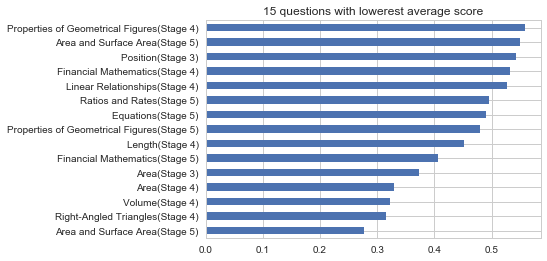

In [46]:
fig,ax = plt.subplots()
question1_mean_y9[:15].plot.barh(ax = ax)
ax.set_title('15 questions with lowerest average score')

** Merge the same questions**

remove the stage

In [47]:
y9_df2 = pd.concat([X_y9_2012,X_y9_2013,X_y9_2014,
                 X_y9_2015,X_y9_2016,X_y9_2017]).set_index('SRN')

In [48]:
new_columns = [syllabus_dict.get(i,0) for i in list(y9_df2.columns) ]
y9_df2.columns = new_columns
y9_df2 = y9_df2.T.reset_index().groupby(['index']).apply(np.mean).T

In [49]:
question2_mean_y9 = y9_df2.mean().sort_values()

In [50]:
df_plot_q = pd.DataFrame(question2_mean_y9,columns=['Average Score']).reset_index()
df_plot_q.columns = ['Question Name', 'Average Score']

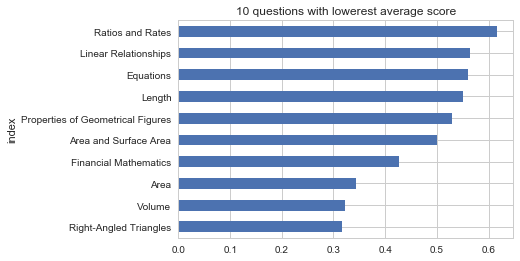

In [51]:
fig,ax = plt.subplots()
question2_mean_y9[:10].plot.barh(ax = ax)
ax.set_title('10 questions with lowerest average score')

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7]),
 <a list of 8 Text xticklabel objects>)

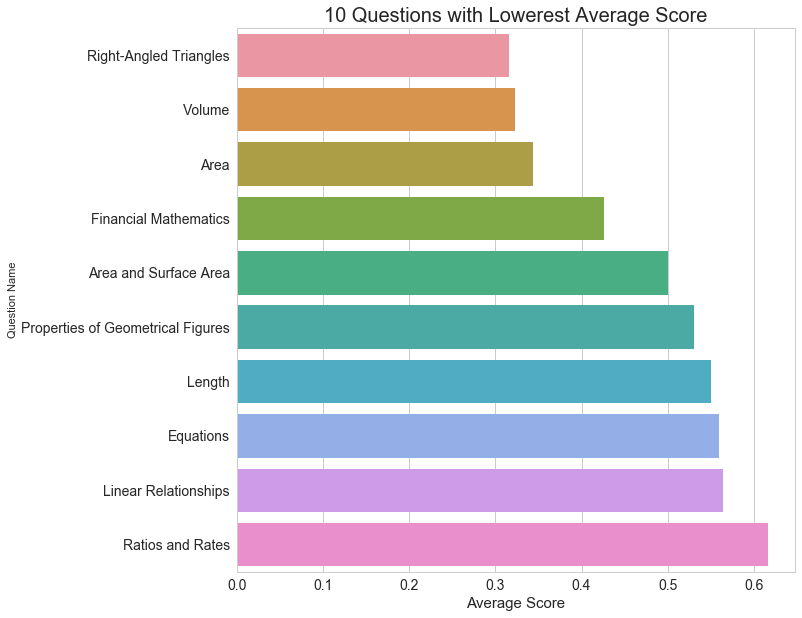

In [90]:
plt.figure(figsize = (10,10))
sns.barplot(x = 'Average Score',y = 'Question Name',data = df_plot_q[:10])
plt.title('10 Questions with Lowerest Average Score',fontsize = 20)
plt.xlabel('Average Score',fontsize = 15)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)

Teachers should pay attending on Area Volumne and Right-angled triangles.

## ** merge with the same area**

Numeracy:

Measurement and Geometry	

Number and Algebra	

Statistics and Probability	

In [53]:
X_y9_2012['Year'] = 2012
X_y9_2013['Year'] = 2013
X_y9_2014['Year'] = 2014
X_y9_2015['Year'] = 2015
X_y9_2016['Year'] = 2016
X_y9_2017['Year'] = 2017

In [54]:
y9_df3 = pd.concat([X_y9_2012,X_y9_2013,X_y9_2014,
                 X_y9_2015,X_y9_2016,X_y9_2017]).set_index('SRN')

In [55]:
column_name = pd.Series(y9_df3.columns)
column_name = column_name.str.replace('MA2-','')
column_name = column_name.str.replace('MA3-','')
column_name = column_name.str.replace('MA4-','')
column_name = column_name.str.replace('MA5.1-','')
column_name = column_name.str.replace('MA5.2-','')
column_name = column_name.str.replace('MA5.3-','')

# only take the last 2 digits
# NA: Number and Algebra, MG: Measurement and Geometry, SP: Statistics and Probability
new_col = column_name.str.extract('\d+(.*)', expand=False)
new_col[58] = 'Year'
new_col = new_col.str.replace('NA','Number and Algebra')
new_col = new_col.str.replace('MG','Measurement and Geometry')
new_col = new_col.str.replace('SP','Statistics and Probability')

y9_df3.columns = new_col

y9_df3 = y9_df3.T.reset_index().groupby(['index']).apply(np.mean).T

In [56]:
y9_df3.head()

index,Measurement and Geometry,Number and Algebra,Statistics and Probability,Year
SRN,,,,
428415078,0.461538,0.803419,0.916667,2012.0
428778791,0.692308,0.729604,0.916667,2012.0
433786998,0.256410,0.364413,0.250000,2012.0
433787021,0.878205,0.962704,0.666667,2012.0
433787048,0.615385,0.837607,1.000000,2012.0


In [57]:
question3_mean_y9 = y9_df3.groupby('Year').mean()
question3_mean_y9

index,Measurement and Geometry,Number and Algebra,Statistics and Probability
Year,,,
2012.0,0.595843,0.760103,0.716828
2013.0,0.549711,0.696148,0.747549
2014.0,0.708220,0.773993,0.916260
2015.0,0.589434,0.574922,0.684380
2016.0,0.592406,0.671388,0.776456
2017.0,0.658414,0.636795,0.687198


In [58]:
question3_mean_y9.mean()

index
Measurement and Geometry      0.615671
Number and Algebra            0.685558
Statistics and Probability    0.754779
dtype: float64

In [59]:
y9_df3.describe()

index,Measurement and Geometry,Number and Algebra,Statistics and Probability,Year
count,1235.000000,1235.000000,1235.000000,1235.000000
mean,0.615717,0.685340,0.754548,2014.505263
std,0.196128,0.185922,0.233300,1.709615
min,0.038462,0.100000,0.000000,2012.000000
25%,0.474359,0.559167,0.650000,2013.000000
50%,0.628205,0.711706,0.800000,2015.000000
75%,0.756410,0.827500,1.000000,2016.000000
max,1.000000,1.000000,1.000000,2017.000000


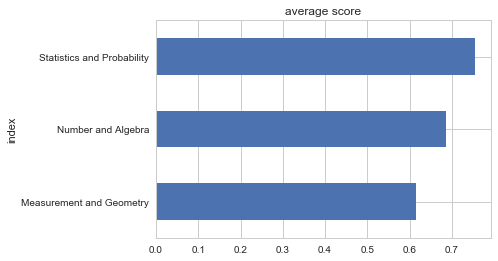

In [60]:
fig,ax = plt.subplots()
question3_mean_y9.mean().plot.barh(ax = ax)
ax.set_title('average score')

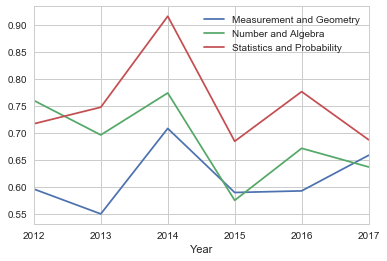

In [61]:
question3_mean_y9.plot()
plt.legend(loc='best')

In [62]:
y9_df3.shape

(1235, 4)

In [63]:
df_y9band_3 = pd.concat([yr2012_y9band, yr2013_y9band,yr2014_y9band,
                       yr2015_y9band,yr2016_y9band,yr2017_y9band])
df_y9band_3.reset_index(drop = True, inplace=True)
y9_df3_heat = y9_df3.reset_index(drop = True)
y9_df3_heat['Y9band'] = df_y9band_3['Band Year 9: Numeracy']
y9_df3_heat.set_index('Y9band', inplace=True)
new_heat = y9_df3_heat.groupby('Y9band').mean()

In [64]:
del new_heat['Year']

In [65]:
new_heat

index,Measurement and Geometry,Number and Algebra,Statistics and Probability
Y9band,,,
5.0,0.132479,0.169052,0.000000
6.0,0.251564,0.279723,0.342014
7.0,0.383446,0.460553,0.551156
8.0,0.522460,0.606567,0.691335
9.0,0.673535,0.742146,0.808007
10.0,0.814594,0.871156,0.918852


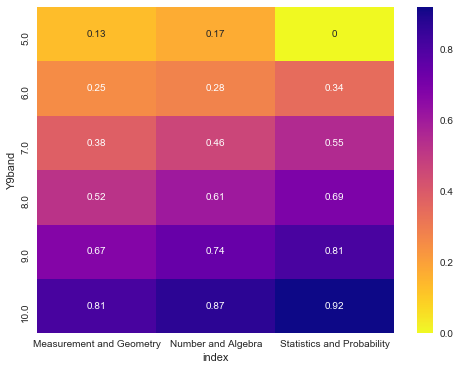

In [66]:
plt.subplots(figsize = (8,6))
sns.heatmap(new_heat, annot=True,cmap = 'plasma_r')

## Y9 verbs analysis

In [67]:
df_v_y9 = pd.concat([X_y9_2012_v,X_y9_2013_v,X_y9_2014_v,X_y9_2015_v,
                     X_y9_2016_v,X_y9_2017_v])

In [68]:
df_v_y9.set_index('SRN', inplace = True)

In [69]:
df_v_mean_y9 = pd.DataFrame(df_v_y9.mean().sort_values(), 
                         columns=['Average_Score'])
df_v_mean_y9.head()

,Average_Score
Combines,0.210784
Compares,0.407767
Generalises,0.407767
Specifies,0.490291
Writes,0.498783


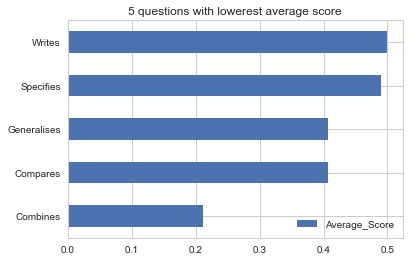

In [70]:
fig,ax = plt.subplots()
df_v_mean_y9[:5].plot.barh(ax = ax)
ax.set_title('5 questions with lowerest average score')

In [71]:
df_v_mean_y9_2 = df_v_mean_y9.reset_index()
df_v_mean_y9_2.columns = ['Verbs', 'Average Score']

In [72]:
sns.set_palette("Blues")

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6]),
 <a list of 7 Text xticklabel objects>)

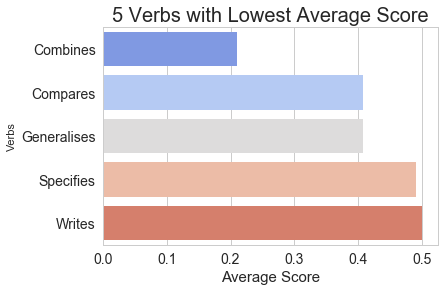

In [85]:

sns.barplot(x='Average Score',y='Verbs',data =df_v_mean_y9_2[:5],palette="coolwarm")
plt.title('5 Verbs with Lowest Average Score',fontsize = 20)
plt.xlabel('Average Score',fontsize = 15)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)

Teachers should spend addition time on how to answer the questions with those verbs. 



to help students to better understand what the examination questions require according to the verbs. 